In [1]:
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import json
import folium
warnings.filterwarnings("ignore")

In [2]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [4]:
election = pd.read_csv('../Data/election_2022.csv', encoding='utf-8')
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
0,서울특별시,종로구,129968,100629,46130,49172,3115
1,서울특별시,중구,111448,84998,38244,42906,2310
2,서울특별시,용산구,199077,152068,60063,85047,4374
3,서울특별시,성동구,252087,197240,84411,103880,5365
4,서울특별시,광진구,303582,235471,109922,113733,7072


In [5]:
election.tail()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
243,경상남도,산청군,31645,24913,7125,16607,464
244,경상남도,거창군,53049,41399,11963,27254,895
245,경상남도,합천군,39768,31270,6911,22742,511
246,제주특별자치도,제주시,408552,296826,157695,122084,10007
247,제주특별자치도,서귀포시,155802,112823,55435,50930,3591


In [10]:
# 기본 통계량 확인하기
# 컬럼명 확인하기
# dimension 확인하기
# 컬럼별 자료 타입 확인하기

election.shape
election.describe()
election.columns
election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   광역시도    248 non-null    object
 1   시군구     248 non-null    object
 2   선거인수    248 non-null    int64 
 3   투표수     248 non-null    int64 
 4   이재명     248 non-null    int64 
 5   윤석열     248 non-null    int64 
 6   심상정     248 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 13.7+ KB


In [12]:
election.describe() # LJM이 std가 높다 (min,max등 같이 봐서)= 지역별 오차가 크다 

,선거인수,투표수,이재명,윤석열,심상정
count,248.000000,248.000000,248.000000,248.000000,248.000000
mean,176570.540323,136147.838710,64479.104839,65566.290323,3215.532258
std,141049.731983,108569.706317,56875.864428,56766.365763,2893.695797
min,8141.000000,6653.000000,1590.000000,2052.000000,109.000000
25%,47671.500000,39215.750000,17363.000000,18223.000000,709.000000
50%,154353.500000,114654.000000,48797.000000,50341.000000,2617.500000
75%,265099.250000,204189.250000,99830.750000,101949.750000,5041.000000
max,703896.000000,542027.000000,285227.000000,275155.000000,13249.000000


In [16]:
# NaN
election.isnull().any() # 하나라도 ture가 있다면 true인 any를 사용해서 전부 false인거 확인

광역시도    False
시군구     False
선거인수    False
투표수     False
이재명     False
윤석열     False
심상정     False
dtype: bool

In [28]:
# election에 electionSum이라는 Column 생성(윤석열+이재명+심상정)
# election.iloc[:,4:7]
election['electionSum'] = election.iloc[:,4:7].sum(axis='columns')
election


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417
1,서울특별시,중구,111448,84998,38244,42906,2310,83460
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727
...,...,...,...,...,...,...,...,...
243,경상남도,산청군,31645,24913,7125,16607,464,24196
244,경상남도,거창군,53049,41399,11963,27254,895,40112
245,경상남도,합천군,39768,31270,6911,22742,511,30164
246,제주특별자치도,제주시,408552,296826,157695,122084,10007,289786


In [33]:
# electionSum이 pop의 몇 %?
election['electionRatio'] = round((election['electionSum']/election['투표수'])*100,2)
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80
1,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.99


In [34]:
# scv로 저장하기
election.to_csv('../Data/election_2022)job.csv', encoding='utf-8', index=False)

In [56]:
# election.pivot(index=election['광역시도'], columns=election['광역시도'],values=election['투표수'], )
#table = 
elec_sum = election.pivot_table("투표수", index='광역시도', aggfunc=sum)
elec_sum.head()

,투표수
광역시도,
강원도,1015458
경기도,8518854
경상남도,2146882
경상북도,1774284
광주광역시,985492


In [57]:
elec_sum_order = elec_sum.sort_values(by='투표수',ascending=False)
elec_sum_order

,투표수
광역시도,
경기도,8518854
서울특별시,6501831
부산광역시,2200224
경상남도,2146882
인천광역시,1883504
경상북도,1774284
대구광역시,1611512
충청남도,1324660
전라남도,1282168


In [60]:
# 전체 투표수의 수도권 투표율
elec_sum_order['투표수'][[0,1,4]].sum()/elec_sum_order['투표수'].sum() * 100

50.064733355557756

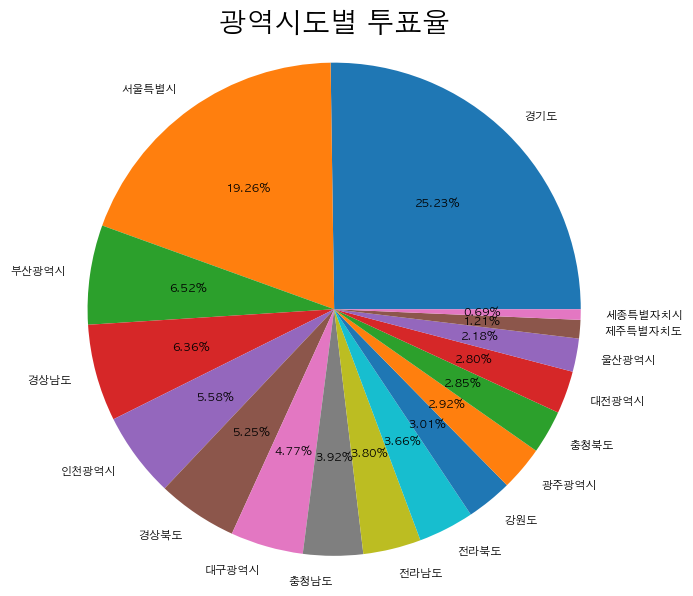

In [81]:
# 광영시도별 투표율 Pie Chart

elec_sum_order['투표수'].plot(
    kind='pie',
    figsize=(7,7),
    autopct = '%.2f%%', # auto percent
    startangle = 0, # 시작지점을 약간 10도 삐딱하게 만들어서 챠트를 그리고 싶다 
)

plt.title('광역시도별 투표율', size=20)
plt.axis('equal') # << pie chart 원의 가로세로 비율
plt.rcParams['font.size'] = 8
plt.ylabel('')
plt.show()

### 윤석열 후보의 광역시도별 득표율을 pie chart로 표현하기

In [93]:
elec_yun_sum = election.pivot_table("윤석열", index='광역시도', aggfunc=sum)
elec_yun_sum = elec_yun_sum.sort_values(by='윤석열',ascending=False)

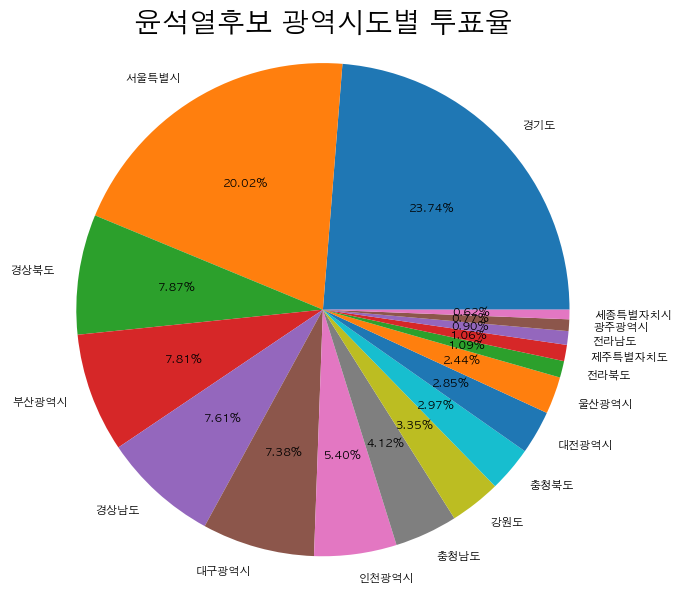

In [95]:
# 광영시도별 투표율 Pie Chart

elec_yun_sum['윤석열'].plot(
    kind='pie',
    figsize=(7,7),
    autopct = '%.2f%%', # auto percent
    startangle = 0, # 시작지점을 약간 10도 삐딱하게 만들어서 챠트를 그리고 싶다 
)

plt.title('윤석열후보 광역시도별 투표율', size=20)
plt.axis('equal') # << pie chart 원의 가로세로 비율
plt.rcParams['font.size'] = 8
plt.ylabel('')
plt.show()

### 윤석열 후보의 서울득표 Top5

In [143]:
elec_yun_top5 = election[election.광역시도 == '서울특별시'].sort_values(by='윤석열',ascending=False).iloc[0:5][['시군구','윤석열']]
elec_yun_top5

,시군구,윤석열
23,송파구,255166
22,강남구,235897
15,강서구,181510
21,서초구,179472
10,노원구,163340


In [150]:
data = election[election.광역시도 == '서울특별시'].sort_values(by='윤석열',ascending=False).iloc[5:][['윤석열']].sum()
data

윤석열    2240362
dtype: int64

In [151]:
elec_yun_top5.loc[5] = ['기타',2240362]
elec_yun_top5.set_index(keys='시군구', inplace=True)
elec_yun_top5

,윤석열
시군구,
송파구,255166
강남구,235897
강서구,181510
서초구,179472
노원구,163340
기타,2240362


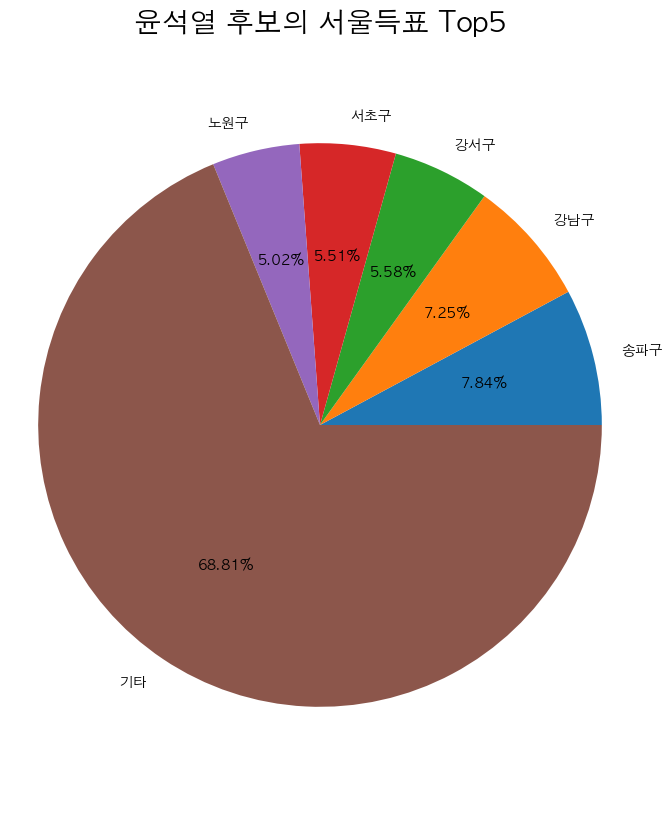

In [159]:
# 광영시도별 투표율 Pie Chart

elec_yun_top5['윤석열'].plot(
    kind='pie',
    figsize=(8,10),
    autopct = '%.2f%%', # auto percent
    startangle = 0, # 시작지점을 약간 10도 삐딱하게 만들어서 챠트를 그리고 싶다 
)

plt.title('윤석열 후보의 서울득표 Top5', size=20)
plt.axis('equal') # << pie chart 원의 가로세로 비율
plt.rcParams['font.size'] = 10
plt.ylabel('')
plt.show()

### 윤석열 후보의 출생지는 성북구, 성북구 투표율만 보자

In [179]:
test = pd.DataFrame(
    election[election.시군구 == '성북구'][['이재명','윤석열','심상정']],
)
test['기타'] = (election[election.시군구 == '성북구']['투표수'])-(election[election.시군구 == '성북구'][['이재명','윤석열','심상정']].sum(axis=1))
test = test.T
test.columns=['투표율']
test

,투표율
이재명,142702
윤석열,135044
심상정,8952
기타,5489


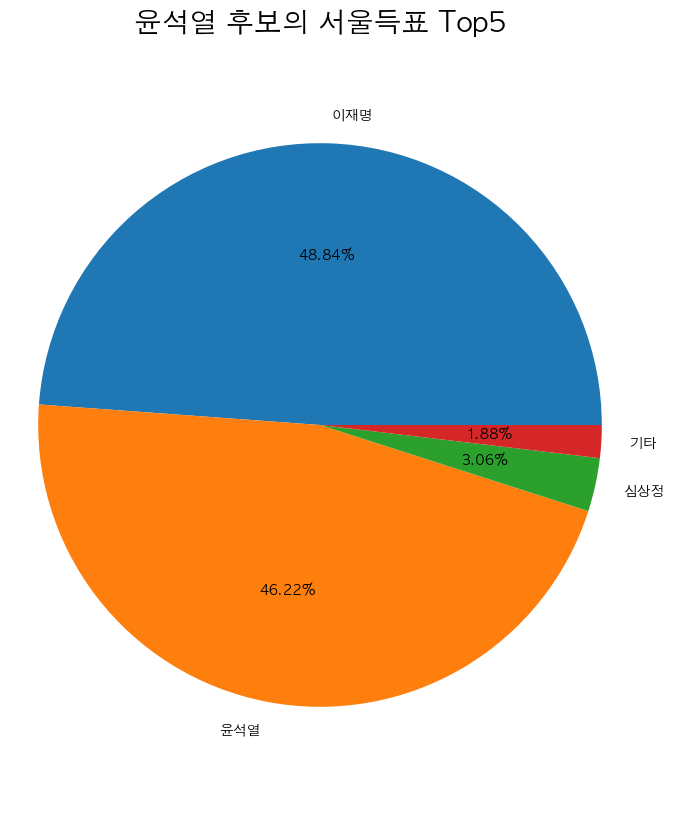

In [181]:
# 광영시도별 투표율 Pie Chart

test['투표율'].plot(
    kind='pie',
    figsize=(8,10),
    autopct = '%.2f%%', # auto percent
    startangle = 0, # 시작지점을 약간 10도 삐딱하게 만들어서 챠트를 그리고 싶다 
)

plt.title('윤석열 후보의 서울득표 Top5', size=20)
plt.axis('equal') # << pie chart 원의 가로세로 비율
plt.rcParams['font.size'] = 10
plt.ylabel('')
plt.show()